# deepdive arousal sentences per annotator

In [174]:
import os

## create the same schema to be used for each user

In [193]:
%mkdir '/Users/ccarey/Documents/Projects/NAMI/rdoc/tasks/sources_arousal'
%cd '/Users/ccarey/Documents/Projects/NAMI/rdoc/tasks/sources_arousal'

schema = """DROP TABLE IF EXISTS _raw_sentences CASCADE;
CREATE TABLE _raw_sentences (
    sentence_id TEXT,
    sentence TEXT,
    terms TEXT
    );

DROP TABLE IF EXISTS _annotated_sentences CASCADE;
CREATE TABLE _annotated_sentences(
  sentence_id TEXT,
  words TEXT[],
  has_term BOOLEAN,
  id BIGINT   -- reserved for DeepDive
  );

DROP TABLE IF EXISTS _extracted_features CASCADE;
  CREATE TABLE _extracted_features (
  sentence_id TEXT,
  feature TEXT
  );
"""

with open('schema.sql', 'w') as f:
    f.write(schema)

mkdir: /Users/ccarey/Documents/Projects/NAMI/rdoc/tasks/sources_arousal: File exists
/Users/ccarey/Documents/Projects/NAMI/rdoc/tasks/sources_arousal


## setup deepdive app for each annotator
creating per annotator : 
- the app directory
- the schema
- an input directory (for preprocessed data)
  + we have done a lot of preprocessing to get files here.
  + Could arguably have instead parsed to get bags of words etc. using user defined functions in deepdive extractors.
- input/init.sh
  + run when 'deepdive initdb'
  + loads our initical database tables.
    - _raw_sentences
    - _annotated_sentences # bags of lemmas and bilemmas...
- a deepdive.conf file.
  + This just has the inference rules in place
- a udf directory (user defined functions aka scripts that deepdive will run in extractors)
  + we would put extraction scripts here but we did so much preprocessing into input files.

In [202]:
app_bn='/Users/ccarey/Documents/Projects/NAMI/rdoc/tasks/deepdive_app/arousal'
annotators = ['JL','MK', 'TC', 'CC']
for a in annotators:
    app_dir = app_bn + '_' + a
    %mkdir {app_dir}
    %cd $app_dir
    h = 'postgresql://localhost/arousal_' + a
    !echo {h} > ./db.url
    %cp '/Users/ccarey/Documents/Projects/NAMI/rdoc/tasks/sources_arousal/schema.sql' ./
    %cp '/Users/ccarey/Documents/Projects/NAMI/rdoc/tasks/sources_arousal/deepdive.conf' ./
    %mkdir ./input
    %cp '/Users/ccarey/Documents/Projects/NAMI/rdoc/tasks/sources_arousal/init.sh' ./input/
    !chmod +x './input/init.sh'
    %mkdir ./udf
    %cp '/Users/ccarey/Documents/Projects/NAMI/rdoc/tasks/sources_arousal/dd_extract_features.py' ./udf/

mkdir: /Users/ccarey/Documents/Projects/NAMI/rdoc/tasks/deepdive_app/arousal_JL: File exists
/Users/ccarey/Documents/Projects/NAMI/rdoc/tasks/deepdive_app/arousal_JL
mkdir: ./input: File exists
mkdir: ./udf: File exists
mkdir: /Users/ccarey/Documents/Projects/NAMI/rdoc/tasks/deepdive_app/arousal_MK: File exists
/Users/ccarey/Documents/Projects/NAMI/rdoc/tasks/deepdive_app/arousal_MK
mkdir: ./input: File exists
mkdir: ./udf: File exists
mkdir: /Users/ccarey/Documents/Projects/NAMI/rdoc/tasks/deepdive_app/arousal_TC: File exists
/Users/ccarey/Documents/Projects/NAMI/rdoc/tasks/deepdive_app/arousal_TC
mkdir: ./input: File exists
mkdir: ./udf: File exists
mkdir: /Users/ccarey/Documents/Projects/NAMI/rdoc/tasks/deepdive_app/arousal_CC: File exists
/Users/ccarey/Documents/Projects/NAMI/rdoc/tasks/deepdive_app/arousal_CC
mkdir: ./input: File exists
mkdir: ./udf: File exists


In [165]:
%pwd

u'/Users/ccarey/Documents/Projects/NAMI/rdoc/tasks/deepdive_app/arousal_CC'

## populating the input directory with preprocessed data from annotations.

### The sentences and indication they are +/- for topic
For each annotator for topic 'arousal' we are generating a single raw_sentences file composed from:
- positive sentences for topic
- negative sentences for topic
- neutral sentences for topic... '\N' indicates null for postgres.

'some text\tTRUE'

'other text\tFALSE'

In [145]:
%pwd

u'/Users/ccarey/Documents/Projects/NAMI/rdoc/tasks/deepdive_app/arousal_CC'

In [207]:
app_bn='/Users/ccarey/Documents/Projects/NAMI/rdoc/tasks/deepdive_app/arousal'
annotators = ['JL','MK', 'TC', 'CC']

for a in annotators:
    app_dir = app_bn + '_' + a
    %cd {app_dir}
    input_dir = os.path.join(app_dir, 'input')
    pos_sent = '/Users/ccarey/Documents/Projects/NAMI/rdoc/results/annotations_processed/AR_' + a + '_pos'
    not_pos_sent = '/Users/ccarey/Documents/Projects/NAMI/rdoc/results/annotations_processed/AR_' + a + '_not_pos'
    neg_sent = '/Users/ccarey/Documents/Projects/NAMI/rdoc/results/annotations_processed/AR_' + a + '_neg'
    print(pos_sent)# create raw_sentences from positive and negative sentences.
    # 1   An example sentence...   TRUE  # + arousal
    # 222 Another sentence....     FALSE # - arousal
    !sed 's/$/\tt/' $pos_sent > ./input/tmp_pos
    !sed 's/$/\tf/' $neg_sent > ./input/tmp_neg
    !sed 's/$/\t\\N/' $not_pos_sent > ./input/tmp_not_pos
    !wc -l ./input/tmp* 
    %cat ./input/tmp* | cat -n | sed 's/^[ ]*//' > ./input/raw_sentences    

/Users/ccarey/Documents/Projects/NAMI/rdoc/tasks/deepdive_app/arousal_JL
/Users/ccarey/Documents/Projects/NAMI/rdoc/results/annotations_processed/AR_JL_pos
      91 ./input/tmp_neg
      64 ./input/tmp_not_pos
     303 ./input/tmp_pos
     458 total
/Users/ccarey/Documents/Projects/NAMI/rdoc/tasks/deepdive_app/arousal_MK
/Users/ccarey/Documents/Projects/NAMI/rdoc/results/annotations_processed/AR_MK_pos
     166 ./input/tmp_neg
     211 ./input/tmp_not_pos
     201 ./input/tmp_pos
     578 total
/Users/ccarey/Documents/Projects/NAMI/rdoc/tasks/deepdive_app/arousal_TC
/Users/ccarey/Documents/Projects/NAMI/rdoc/results/annotations_processed/AR_TC_pos
      62 ./input/tmp_neg
     267 ./input/tmp_not_pos
     155 ./input/tmp_pos
     484 total
/Users/ccarey/Documents/Projects/NAMI/rdoc/tasks/deepdive_app/arousal_CC
/Users/ccarey/Documents/Projects/NAMI/rdoc/results/annotations_processed/AR_CC_pos
       0 ./input/tmp_neg
       0 ./input/tmp_not_pos
       0 ./input/tmp_pos
       0 total


In [136]:
%pwd

u'/Users/ccarey/Documents/Projects/NAMI/rdoc/tasks/deepdive_app/arousal_CC'

### NLP: The bags of words from the same sentences, and in the same order.

#### Use spacy to do NLP parsing into bags of words etc.

In [89]:
import io
import codecs
from spacy.en import English
nlp = English(parser=True, tagger=True) # so we can sentence parse

In [90]:
def spacy_split_sentences(text):
    sentences = []
    #doc = nlp(text.decode('utf8')) #"This is a sentence. Here's another...".decode('utf8'))
    doc = nlp(text) #"This is a sentence. Here's another...".decode('utf8'))
    for span in doc.sents:
        #sentences.append(u''.join(doc[i].string for i in range(span.start, span.end)).encode('utf-8').strip())
        sentences.append(''.join(doc[i].string for i in range(span.start, span.end)))#.strip())
    return(sentences)

In [91]:
def spacy_lemma_gt_len(text, length=2):
    '''Create bag of unique lemmas, requiring lemma length > length
    
    Note: setting length to 1 may mess up our postgres arrays as we would
    get commas here, unless we were to quote everything.
    '''
    tokens = []
    #doc = nlp(text.decode('utf8')) #"This is a sentence. Here's another...".decode('utf8'))
    parsed_data = nlp(text) #"This is a sentence. Here's another...".decode('utf8'))
    for token in parsed_data:
        if len(token.lemma_) > length:
            tokens.append(token.lemma_.lower())
    return(list(set(tokens)))

In [92]:
def spacy_lemma_biwords_gt_len(text, length=3):
    '''Create bag of unique bi-lemmas, requiring lemma length > length
    
    We are crudely eliminating any bi-lemmas that have commas in them to save us in loading postgres arrays.
    '''
    biwords = []
    parsed_data = nlp(text)
    skip_chars = [',', '"', "'"]
    for i in range(1, len(parsed_data) - 1):
        skip = False
        biword = u'{} {}'.format(parsed_data[i].lemma_.lower(), parsed_data[i+1].lemma_.lower())
        if (parsed_data[i].lemma_ in skip_chars or parsed_data[i+1].lemma_ in skip_chars):
            skip = True
        if len(biword) > length and not skip:
            biwords.append(biword)
    return(list(set(biwords)))

In [93]:
def to_lemmas_and_lemma_biwords(sentence, lemma_len=2, bi_lemma_len=4):
    lemma = spacy_lemma_gt_len(sentence, length=lemma_len)
    lemma_biwords = spacy_lemma_biwords_gt_len(sentence, length=bi_lemma_len)
    return(lemma + lemma_biwords)

#### Cleaning the sentences from raw sentences and creating bags of words, biwords
sentence_id    sentence    is_topic

To:

sentence_id    bags_of_lemmas   is_topic   '\N'

In [248]:
#app_bn='/Users/ccarey/Documents/Projects/NAMI/rdoc/tasks/deepdive_app/arousal'
app_bn='/Users/ccarey/Documents/Projects/NAMI/rdoc/tasks/deepdive_app/arousal'
for a in annotators:
    app_dir = app_bn + '_' + a
    input_dir = os.path.join(app_dir, 'input')
    %cd {input_dir}
    bags_of_lemmas = []
    with codecs.open('raw_sentences', mode='r', encoding='utf-8') as f:
        sents = f.read().splitlines()
        print(len(sents))
        for s in sents:
            ss = s.split('\t')
            s_id, s_sent, s_is_topic = ss[0], ss[1], ss[2]
            s_sent = s_sent.replace('{{', '').replace('}}', '').strip()
            lbw = to_lemmas_and_lemma_biwords(s_sent)
            lbw = ', '.join(lbw)
            lbw = u'{{{}}}'.format(lbw) # This is for postgres array format
            bags_of_lemmas.append('\t'.join([s_id, lbw, s_is_topic, '\N'])) # '\N' null for postgres
    with codecs.open('./annotated_sentences', 'w', encoding='utf-8') as f:
        for b in bags_of_lemmas:
            f.write(b + '\n')

/Users/ccarey/Documents/Projects/NAMI/rdoc/tasks/deepdive_app/arousal_JL/input
588
/Users/ccarey/Documents/Projects/NAMI/rdoc/tasks/deepdive_app/arousal_MK/input
578
/Users/ccarey/Documents/Projects/NAMI/rdoc/tasks/deepdive_app/arousal_TC/input
484
/Users/ccarey/Documents/Projects/NAMI/rdoc/tasks/deepdive_app/arousal_CC/input
0


## Deepdive init through run
initdb requires but does not use the deepdive.conf file.

It sets up the application and database based on db.url and schema.sql

Using the init.sh, loads the first couple tables into database.

APP_HOME is already set by time deepdive runs the input/init.sh file.

### input/init.sh file

In [205]:
app_bn='/Users/ccarey/Documents/Projects/NAMI/rdoc/tasks/deepdive_app/arousal'
for a in annotators:
    print('Initializing deepdive for {}'.format(a))
    app_dir = app_bn + '_' + a
    %cd {app_dir}
    !deepdive initdb
    run_result = !deepdive run

Initializing deepdive for JL
/Users/ccarey/Documents/Projects/NAMI/rdoc/tasks/deepdive_app/arousal_JL
NOTICE:  table "_raw_sentences" does not exist, skipping
DROP TABLE
CREATE TABLE
NOTICE:  table "_annotated_sentences" does not exist, skipping
DROP TABLE
CREATE TABLE
NOTICE:  table "_extracted_features" does not exist, skipping
DROP TABLE
CREATE TABLE
COPY 458
COPY 458
Initializing deepdive for MK
/Users/ccarey/Documents/Projects/NAMI/rdoc/tasks/deepdive_app/arousal_MK
NOTICE:  table "_raw_sentences" does not exist, skipping
DROP TABLE
CREATE TABLE
NOTICE:  table "_annotated_sentences" does not exist, skipping
DROP TABLE
CREATE TABLE
NOTICE:  table "_extracted_features" does not exist, skipping
DROP TABLE
CREATE TABLE
COPY 578
COPY 578
Initializing deepdive for TC
/Users/ccarey/Documents/Projects/NAMI/rdoc/tasks/deepdive_app/arousal_TC
NOTICE:  table "_raw_sentences" does not exist, skipping
DROP TABLE
CREATE TABLE
NOTICE:  table "_annotated_sentences" does not exist, skipping
DROP T

### review initial loading of deepdive database (MK as annotator)
init.sh script should have filled the _raw_sentences and _annotated_sentences.

In [188]:
%cd '/Users/ccarey/Documents/Projects/NAMI/rdoc/tasks/deepdive_app/arousal_MK'

/Users/ccarey/Documents/Projects/NAMI/rdoc/tasks/deepdive_app/arousal_MK


In [189]:
!deepdive sql '\d+'

                                            List of relations
 Schema |                       Name                       |   Type   | Owner  |    Size    | Description 
--------+--------------------------------------------------+----------+--------+------------+-------------
 public | _annotated_sentences                             | table    | ccarey | 776 kB     | 
 public | _annotated_sentences_has_term_calibration        | view     | ccarey | 0 bytes    | 
 public | _annotated_sentences_has_term_inference          | view     | ccarey | 0 bytes    | 
 public | _annotated_sentences_has_term_inference_bucketed | view     | ccarey | 0 bytes    | 
 public | _extracted_features                              | table    | ccarey | 1040 kB    | 
 public | _raw_sentences                                   | table    | ccarey | 152 kB     | 
 public | dd__annotated_sentences_has_term_cardinality     | table    | ccarey | 16 kB      | 
 public | dd__annotated_sentences_vtype                    

In [190]:
raw_count = !deepdive sql 'select count(*) from _raw_sentences'
annot_count = !deepdive sql 'select count(*) from _raw_sentences'
print(raw_count[2])
print(annot_count[2])

   578
   578


In [191]:
!deepdive sql 'select * from _raw_sentences limit 3'
!deepdive sql 'select * from _annotated_sentences limit 3'

 sentence_id |                                                                             sentence                                                                             | terms 
-------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------+-------
 1           | {{Active inference provides a simple and neurobiologically plausible account of how action and perception are coupled in producing (Bayes) optimal behaviour. }} | f
 2           | {{This can be seen most easily as minimising prediction error: we can either change our predictions to explain sensory input through perception. }}              | f
 3           | {{Alternatively, we can actively change sensory input to fulfil our predictions. }}                                                                              | f
(3 rows)

 sentence_id |                                                                  

### examine output plots
TC example, small negative training set.

In [208]:
from IPython.display import Image

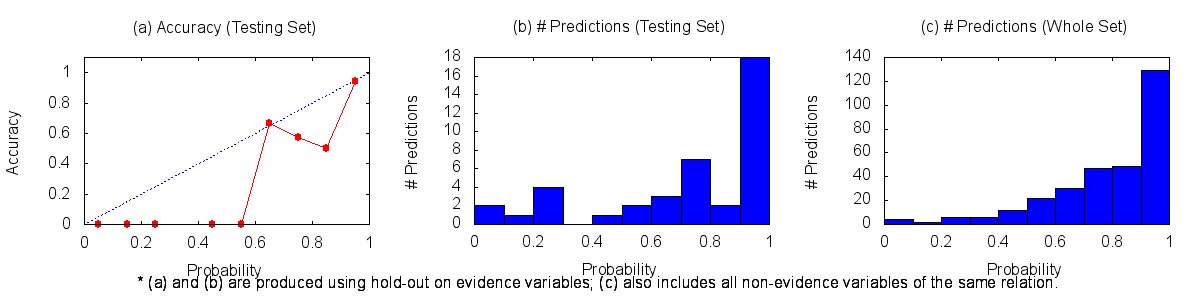

In [211]:
Image(filename = '/Users/ccarey/Documents/Projects/NAMI/rdoc/documentation_figures/_annotated_sentences.has_term_TC.png')

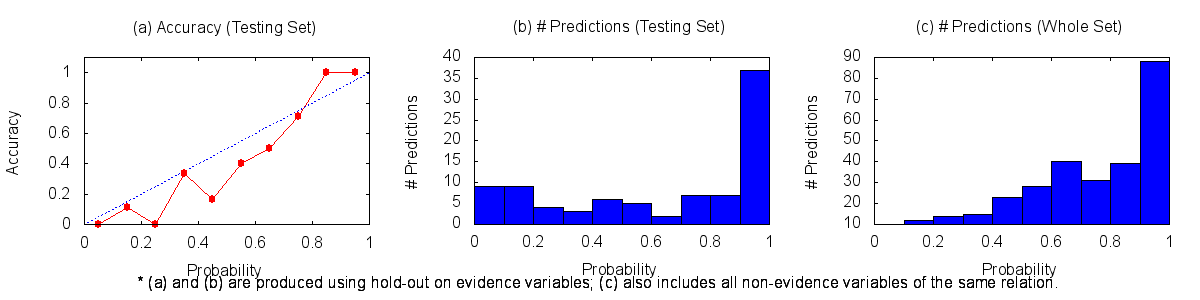

In [215]:
# MK
Image(filename = '/Users/ccarey/Documents/Projects/NAMI/rdoc/documentation_figures/_annotated_sentences.has_term_MK.png')

### few training set on left side, desire more negative examples

### JL has few negative examples and fewer negative predictions

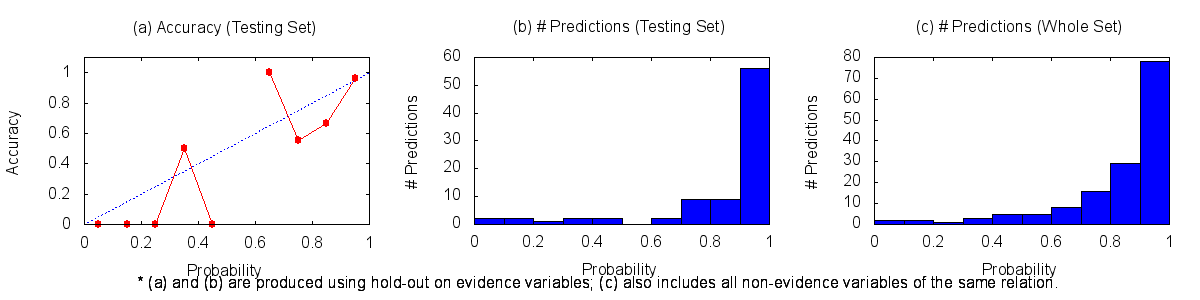

In [254]:
# JL
Image(filename = '/Users/ccarey/Documents/Projects/NAMI/rdoc/documentation_figures/_annotated_sentences.has_term_JL_91_neg.png')

## Rerunning JL SET giving it more negative examples helps a bit.

In [ ]:
%cd ../arousal_JL/input/
%mv tmp_neg _tmp_neg_bkup
%mv raw_sentences _raw_sentences_bkup
%cp ../../arousal_MK/input/tmp_neg ./

In [226]:
%cd /Users/ccarey/Documents/Projects/NAMI/rdoc/tasks/deepdive_app/arousal_JL
!wc -l ./input/tmp* 
%cat ./input/tmp* | cat -n | sed 's/^[ ]*//' > ./input/raw_sentences

/Users/ccarey/Documents/Projects/NAMI/rdoc/tasks/deepdive_app/arousal_JL
     166 ./input/tmp_neg
      64 ./input/tmp_not_pos
     303 ./input/tmp_pos
     533 total


In [228]:
# Rerun the bag of words to generate the new annotated sentences for JL then...
# bag of words step left us in wrong directory, so move back in to JL
%cd /Users/ccarey/Documents/Projects/NAMI/rdoc/tasks/deepdive_app/arousal_JL
init_results = !deepdive initdb
run_results = !deepdive run

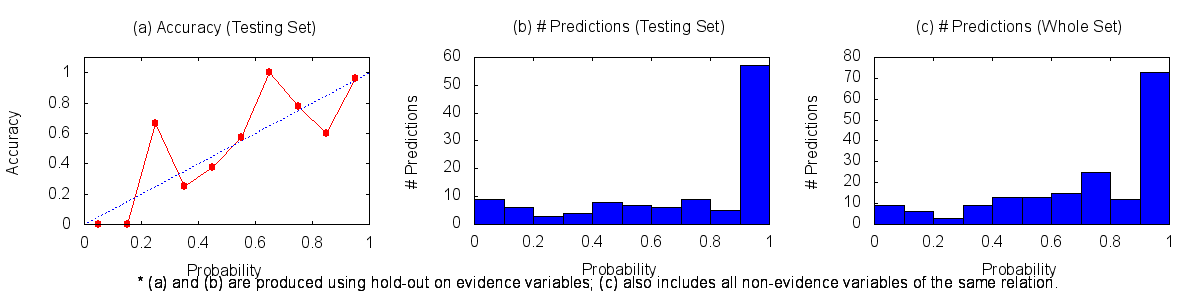

In [251]:
Image(filename = '/Users/ccarey/Documents/Projects/NAMI/rdoc/documentation_figures/_annotated_sentences.has_term_JL2_166_neg.png')

### Create new negative set

In [244]:
%cd /Users/ccarey/Documents/Projects/NAMI/rdoc/results/annotations_processed
%cp [AL][^R]*/*/*.txt all_non_arousal/ # yes we are overwriting some, doesn't matter
!cat all_non_arousal/*.txt | sed '/^$/d' > ../../tasks/deepdive_app/arousal_JL/input/new_neg
%cd ../../tasks/deepdive_app/arousal_JL
!sed 's/$/\tf/' input/new_neg > ./input/tmp_neg
!wc -l ./input/tmp* 

/Users/ccarey/Documents/Projects/NAMI/rdoc/results/annotations_processed
/Users/ccarey/Documents/Projects/NAMI/rdoc/tasks/deepdive_app/arousal_JL
     221 ./input/tmp_neg
      64 ./input/tmp_not_pos
     303 ./input/tmp_pos
     588 total


In [246]:
%cat ./input/tmp* | cat -n | sed 's/^[ ]*//' > ./input/raw_sentences  

In [249]:
%pwd

u'/Users/ccarey/Documents/Projects/NAMI/rdoc/tasks/deepdive_app/arousal_CC/input'

In [250]:
# rerun bag of words step, then...
%cd /Users/ccarey/Documents/Projects/NAMI/rdoc/tasks/deepdive_app/arousal_JL
results_init = !deepdive initdb
results_run = !deepdive run

/Users/ccarey/Documents/Projects/NAMI/rdoc/tasks/deepdive_app/arousal_JL


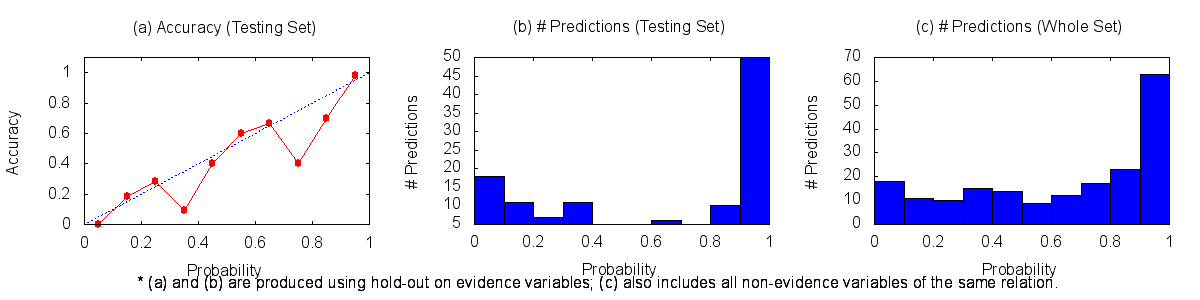

In [253]:
Image(filename = '/Users/ccarey/Documents/Projects/NAMI/rdoc/documentation_figures/_annotated_sentences.has_term_JL3_221_neg.png')